# Deforestation of the Pacific Temperate Rainforests - Modeling

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, BaggingRegressor

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2, l1_l2

In [2]:
model_data = pd.read_csv('./data/cleaned_data/central_coast_model_df.csv')

In [3]:
model_data.set_index('YEAR', inplace = True)

In [4]:
model_data

,PRCP estimate,TMAX,TMIN,TAVG,area_tree_cover_jan1,area_tree_cover_loss_Ha,area_burn_Ha,area_tree_cover_dec31,percentage_tree_cover_loss,percentage_tree_cover_loss_over_logging_land,co2_emission_Mg,cumulative_loss_area,true_area_tree_cover_jan1,true_area_tree_cover_dec31,true_percentage_tree_cover_loss
YEAR,,,,,,,,,,,,,,,
2001,1203.100000,29.0,2.6,15.80,1.603821e+06,1203.934039,145.388563,1.602618e+06,0.000751,0.000751,5.147169e+05,1349.322602,1.603821e+06,1.602472e+06,0.000841
2002,1035.135989,31.0,2.3,16.65,1.602618e+06,1298.841284,25.373653,1.601319e+06,0.000810,0.000810,4.873691e+05,1324.214936,1.602472e+06,1.601293e+06,0.000826
2003,1192.479042,33.2,3.4,18.30,1.601319e+06,796.634859,100.980558,1.600522e+06,0.000497,0.000497,3.320122e+05,897.615416,1.601147e+06,1.600421e+06,0.000561
2004,1484.433060,34.7,3.4,19.05,1.600522e+06,10855.552080,15065.489648,1.589667e+06,0.006783,0.006783,2.194606e+06,25921.041728,1.600250e+06,1.574601e+06,0.016198
2005,1418.691617,31.2,5.3,18.25,1.589667e+06,3906.168671,33.792675,1.585760e+06,0.002457,0.002457,1.283370e+06,3939.961346,1.574329e+06,1.585727e+06,0.002503
2006,2056.948324,28.9,4.4,16.65,1.585760e+06,1052.593717,0.000000,1.584708e+06,0.000664,0.000664,4.392463e+05,1052.593717,1.570389e+06,1.584708e+06,0.000670
2007,3786.482808,32.1,5.4,18.75,1.584708e+06,2216.374182,0.000000,1.582491e+06,0.001399,0.001399,8.476379e+05,2216.374182,1.569336e+06,1.582491e+06,0.001412
2008,2979.971671,28.1,2.7,15.40,1.582491e+06,1278.326130,0.000000,1.581213e+06,0.000808,0.000808,5.850874e+05,1278.326130,1.567120e+06,1.581213e+06,0.000816
2009,2725.775140,32.0,4.0,18.00,1.581213e+06,4125.643557,5091.424460,1.577087e+06,0.002609,0.002609,1.211515e+06,9217.068017,1.565842e+06,1.571996e+06,0.005886


In [5]:
# Will use true percentage of deforestation (including logging and fires)

## Setting up Training and Testing Data

In [6]:
X = model_data[['PRCP estimate', 'TMAX', 'TAVG', 'co2_emission_Mg', 'area_tree_cover_loss_Ha']]
y = model_data['true_percentage_tree_cover_loss']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Baseline Score

In [9]:
baseline = np.mean(model_data['true_percentage_tree_cover_loss'])

In [10]:
baseline

0.002850005924092065

In [11]:
(metrics.mean_squared_error(y_train, [baseline] * len(y_train))**.5)

0.003953220689568387

In [12]:
(metrics.mean_squared_error(y_test, [baseline] * len(y_test))**.5)

0.002317315907247868

## Linear Regression

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
lr.score(X_train,y_train)

0.9582602624139873

In [16]:
lr.score(X_test, y_test)

-0.31409807497253883

In [17]:
(metrics.mean_squared_error(y_train, lr.predict(X_train)))**.5

0.0008076529720393297

In [18]:
(metrics.mean_squared_error(y_test, lr.predict(X_test)))**.5

0.0026562549834319503

In [19]:
(metrics.mean_squared_error(y_test, lr.predict(X_test)))**.5 / baseline

0.9320173551141517

## Random Forest / Extra Trees

In [20]:
rf = RandomForestRegressor(n_estimators=100)
et = ExtraTreesRegressor(n_estimators=200)

In [21]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [22]:
rf.score(X_train, y_train)

0.9261220222122238

In [23]:
rf.score(X_test, y_test)

0.5323330069445662

In [24]:
(metrics.mean_squared_error(y_train, rf.predict(X_train)))**.5

0.001074502519104399

In [25]:
(metrics.mean_squared_error(y_test, rf.predict(X_test)))**.5

0.0015846167137415323

In [26]:
(metrics.mean_squared_error(y_test, rf.predict(X_test)))**.5 / baseline

0.5560047087433154

In [27]:
et.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=200)

In [28]:
et.score(X_train, y_train)

1.0

In [29]:
et.score(X_test, y_test)

0.6301501676926154

In [30]:
(metrics.mean_squared_error(y_train, et.predict(X_train)))**.5

1.998179995683074e-17

In [31]:
(metrics.mean_squared_error(y_test, et.predict(X_test)))**.5

0.001409186862455217

In [32]:
(metrics.mean_squared_error(y_test, et.predict(X_test)))**.5 / baseline

0.4944505029069881

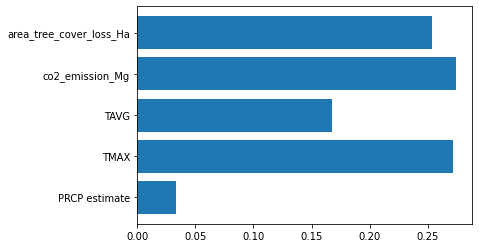

In [33]:
plt.barh(list(X.columns), rf.feature_importances_);

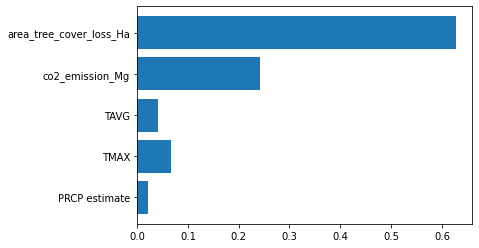

In [34]:
plt.barh(list(X.columns), et.feature_importances_);

## ADA Boosting

In [35]:
ad = AdaBoostRegressor()
ad.fit(X_train,y_train)

AdaBoostRegressor()

In [36]:
ad.score(X_train, y_train)

0.996966718136966

In [37]:
ad.score(X_test, y_test)

0.6407164046100807

In [38]:
(metrics.mean_squared_error(y_train, ad.predict(X_train)))**.5 / baseline

0.07639423033666327

In [39]:
(metrics.mean_squared_error(y_test, ad.predict(X_test)))**.5 / baseline

0.4873363474181231

## Bagging Regressor

In [40]:
bag = BaggingRegressor(random_state=42)
bag.fit(X_train, y_train)

BaggingRegressor(random_state=42)

In [41]:
bag.score(X_train, y_train)

0.9073588813601675

In [42]:
bag.score(X_test, y_test)

0.47933407688641105

In [49]:
(metrics.mean_squared_error(y_train, bag.predict(X_train)))**.5

0.0012032388159524618

In [50]:
(metrics.mean_squared_error(y_test, bag.predict(X_test)))**.5

0.0016719968308847133

In [43]:
(metrics.mean_squared_error(y_train, bag.predict(X_train)))**.5 / baseline

0.4221881806564248

In [44]:
(metrics.mean_squared_error(y_test, bag.predict(X_test)))**.5 / baseline

0.5866643352390105

## Neural Net Deep Learning Model

In [45]:
# construct network
model = Sequential()

# first layer
model.add(Dense(24,
               input_shape=(X_train.shape[1],),
               activation='relu'))

# second layer (Hidden layer)
model.add(Dense(24, activation='relu'))

# output layer
model.add(Dense(1))

In [46]:
model.compile(loss='mse', optimizer='adam')

In [47]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=100, verbose = 1);

Epoch 1/100
1/1 [==============================] - 0s 361ms/step - loss: 0.0514 - val_loss: 0.0636
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 0.0425 - val_loss: 0.0584
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 0.0346 - val_loss: 0.0535
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 0.0280 - val_loss: 0.0487
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 0.0223 - val_loss: 0.0440
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 0.0176 - val_loss: 0.0397
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 0.0138 - val_loss: 0.0355
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 0.0108 - val_loss: 0.0318
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 0.0085 - val_loss: 0.0285
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 0.0068 - val_loss: 0.0257
Epoch 11/100
1/1 [

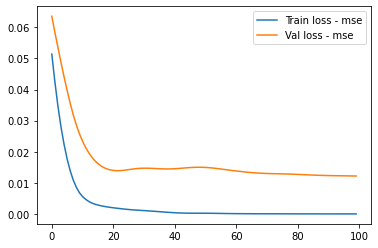

In [48]:
plt.plot(history.history['loss'], label='Train loss - mse')
plt.plot(history.history['val_loss'], label='Val loss - mse')
plt.legend();

In [52]:
rmse_training = 6.4832e-06 ** 0.5
rmse_training

0.0025462128740543276

In [53]:
rmse_testing = 0.0122 ** 0.5
rmse_testing

0.11045361017187261

In [54]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

model_l2 = Sequential()

# BatchNormalization layer
model_l2.add(BatchNormalization())

# first layer
model_l2.add(Dense(24,
               input_shape=(X_train.shape[1],),
               activation='relu', kernel_regularizer=l2(0.001)))

# second layer (Hidden layer)
model_l2.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model_l2.add(Dropout(0.05))

# third layer (Hidden layer)
model_l2.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model_l2.add(Dropout(0.2))

# fourth layer (Hidden layer)
model_l2.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))

# output layer
model_l2.add(Dense(1, kernel_regularizer=l2(0.001)))

# compile model
model_l2.compile(loss='mse', optimizer='adam')

# creating a callback
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')

# Fit the model
history_l2 = model_l2.fit(X_train, y_train, validation_data = (X_test, y_test), 
                          epochs=100, batch_size = None, callbacks=[early_stop])

Epoch 1/100
1/1 [==============================] - 1s 566ms/step - loss: 0.2226 - val_loss: 0.2169
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 0.2174 - val_loss: 0.2196
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 0.2235 - val_loss: 0.2162
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 0.2141 - val_loss: 0.2119
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 0.2114 - val_loss: 0.2084
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2096 - val_loss: 0.2057
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2061 - val_loss: 0.2031
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 0.2055 - val_loss: 0.2010
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 0.2019 - val_loss: 0.1989
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2000 - val_loss: 0.1969
Epoch 11/100
1/1 [

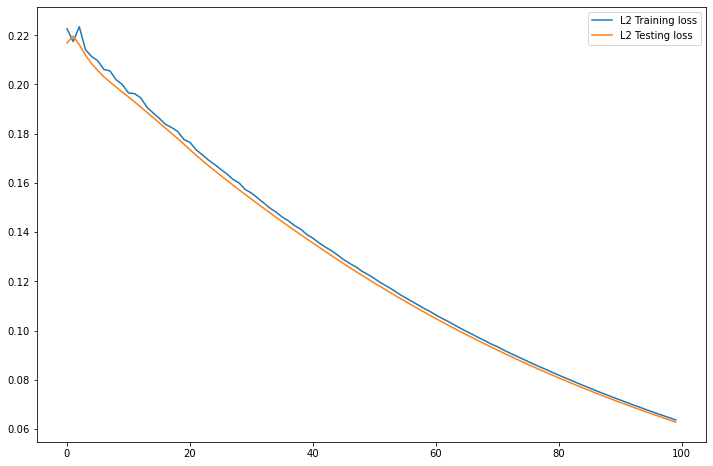

In [55]:
# Plotting loss
plt.figure(figsize=(12, 8))
plt.plot(history_l2.history['loss'], label='L2 Training loss')
plt.plot(history_l2.history['val_loss'], label='L2 Testing loss')
plt.legend();

In [56]:
rmse_training = 0.0638 ** 0.5
rmse_training

0.2525866188063018

In [57]:
rmse_testing = 0.0629 ** 0.5
rmse_testing

0.25079872407968906